<a href="https://colab.research.google.com/github/MafikengZ/NLP-Tweet-Sentiment-Ananlysis/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 12 - Classification Predict

© Explore Data Science Academy

---

## Team Members

 - [Blessing Mvana Nhlozi](https://www.linkedin.com/in/blessingmvananhlozi/)
 - [Rebecca Kekana](https://www.linkedin.com/in/rebeccakekana/)
 - [Sello Tebogo Mafikeng](https://www.linkedin.com/in/sello-sydney-mafikeng-46a664110/)
 - [Mpilenhle Hlatshwayo](https://www.linkedin.com/in/mpilenhle-hlatshwayo-70544b169/)


## Introduction: Climate Change Belief Analysis

Many businesses are based on reducing one's carbon footprint or environmental impact. They provide ecologically friendly and sustainable products and services that are consistent with their principles and goals. Such companies would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.
 

<img src="https://github.com/MafikengZ/NLP-Tweet-Sentiment-Ananlysis/blob/main/API/resources/imgs/worl.jpg?raw=true" width=75%/>


## Predict Overview

We have been tasked with creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


The structure of this notebook is as follows:

 - First, we'll load our data to get a view of the predictor and response variables we will be modeling. 
 
 - We will then preprocess our data, cleaning or removing unwanted charecters such as `Hashtags #` `RT` `@ mentions` `urls` `emojis`.
 
 - We will preprocess our data, normalising the tokens in the tweets using processes such as  `Stemming` and `Lemmatizing`.
  
 - Then vectorise the tweets and splitting up the data into train and test sets.

 - We then model our data using a various models such as `SVC` `Naive Bayes` and `Linear Logistics`, paying attention to multiclass versus binary classification model parameters.
 
 - Following this modeling, we use the f1 score to determine the best performing model.
 
 - Using this metric, we then take several steps to improve our base model's performance by optimising the hyperparameters of the model through a `grid search strategy` , then use the `K best` for best feature selection.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Preprocessing</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages

In this section we import the necessary libraries needed for Data Analysis, Data Preprocessing, Data Visualization, Feature Engineering and Model Building.

In [2]:
# import relevant libraries
import nltk
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

from textblob import TextBlob
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
pd.set_option('display.max_rows', 100)
from sklearn.utils import resample
from sklearn.pipeline import Pipeline


from nltk.corpus import stopwords
# importing tokenizing library
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
#importing stemmer library
from nltk import SnowballStemmer

from sklearn.metrics import classification_report

# set plot style
# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud

from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Load the Train and Test datasets from the github repository

In [3]:
# Loading Data
df_train = pd.read_csv('https://raw.githubusercontent.com/MafikengZ/NLP-Tweet-Sentiment-Ananlysis/main/data/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/MafikengZ/NLP-Tweet-Sentiment-Ananlysis/main/data/test.csv')

In [4]:
df_train_copy = df_train.copy()

#### The Dataset 

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

#### Class description:
 
 - 0 -->  Neutral: the tweet neither supports nor refutes the belief of man-made climate change.
 - 1 -->  Believer: the tweet supports the belief of man-made climate change.
 - 2 -->  News: the tweet links to factual news about climate change.
 - -1 --> Denier: the tweet does not believe in man-made climate change.
 
 
#### Training data columns:
This dataset consists of the following Columns: 

 - sentiments --> the sentiment class that each tweet can be characterised described above.
 - message    --> the novel tweet data.
 - tweetid    --> the tweet unique id.


#### Basic Analysis

Let us take a look at the Train and Test data frames below.

In [ ]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
df_train.shape

(15819, 3)

In [ ]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [ ]:
df_test.shape

(10546, 2)

#### Sentiment Data Distribution

The code cells below allows us to visualise how the data is ditributed amongst the four disctinct classes.

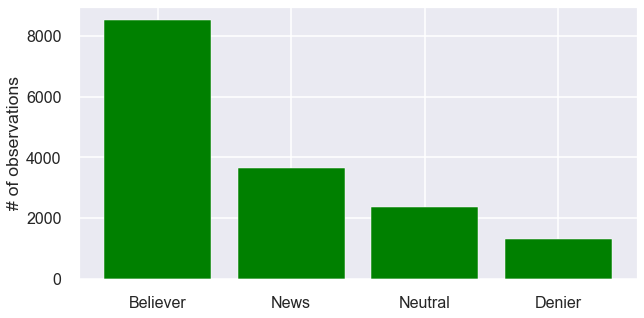

In [ ]:
labels = ['Believer', 'News', 'Neutral', 'Denier'] 

# Get all possible labels
plt.figure(figsize=(10,5))
plt.bar(labels,df_train['sentiment'].value_counts() ,color='green')
plt.xticks(labels,  ['Believer', 'News', 'Neutral', 'Denier']  )
plt.ylabel("# of observations")
plt.show()

We can clearly see that there is an imbalance in the data: there are 8530 observations in class 1 (AKA 'Pro') and only 1296 in class -1 (AKA Anti). This can be an issue during modeling and a resample of the dataset may be useful. We will address this at a later stage in the notebook.

Text(0, 0.5, 'Density')

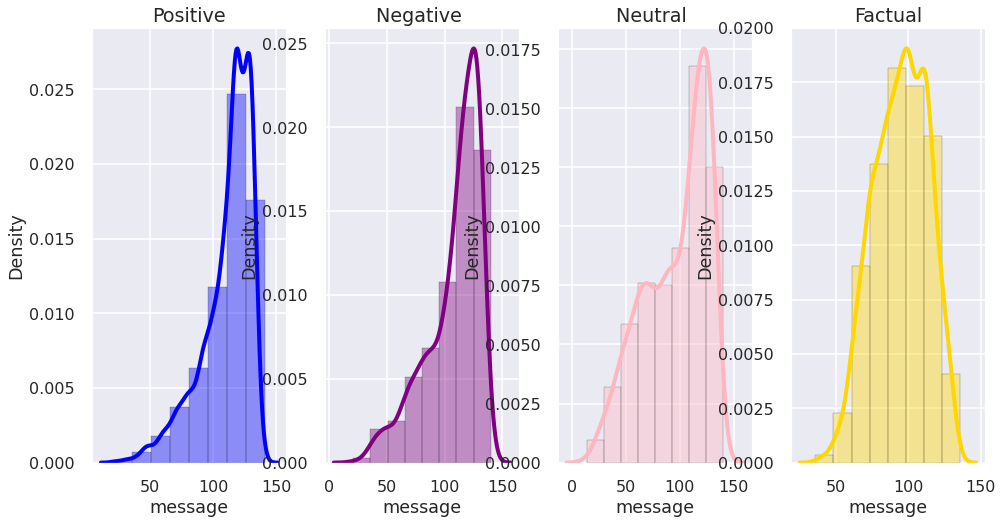

In [24]:
# Distribution plots for the label
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))
plt.title('Average Length of Messages Per Sentiment')
#For Positive 
sns.distplot(df_train[df_train['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Positive')
ax1.set_ylabel('Density')


#For Negative 
sns.distplot(df_train[df_train['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'purple', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Negative ')
ax2.set_ylabel('Density')

#For Neutral 
sns.distplot(df_train[df_train['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'lightpink',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_ylabel('Density')

#For News
sns.distplot(df_train[df_train['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'gold', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('Factual')
ax4.set_ylabel('Density')

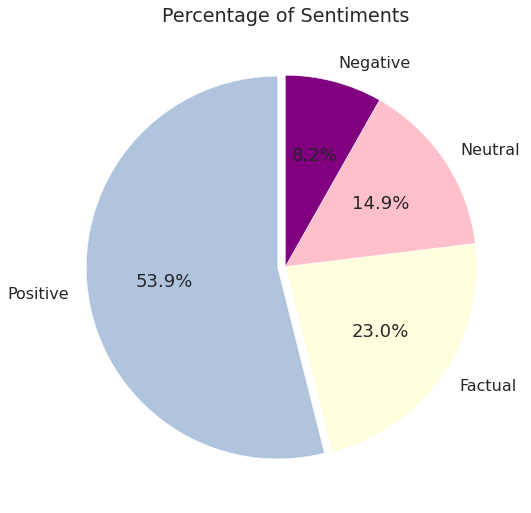

In [25]:
perc = [round((df_train['sentiment'] == 1).sum() / df_train.shape[0] *100,2),
        round((df_train['sentiment'] == 2).sum() / df_train.shape[0] *100,2),
        round((df_train['sentiment'] == 0).sum() / df_train.shape[0] *100,2),
        round((df_train['sentiment'] == -1).sum() / df_train.shape[0] *100,2)]

# checking the numerical distribution
values = perc
labels = ['Positive' , 'Factual' , 'Neutral', 'Negative']
colors = ['lightsteelblue', 'lightyellow', 'pink', 'purple']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors)
plt.title('Percentage of Sentiments')
plt.show()

## 3. Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Before we can do Exploratory Data Analysis (EDA) in section 4, we need to ensure that our data is in a clean format that can actually be used. The tweets have a lot of charecters that are not very usefull and may cause noise in our data, therefore, with the use of regualar expressions we can remove these charecters which include:

 - Hashtags.
 - RT for retweets.
 - @ for mentions.
 - Web urls.
 - Eemojis.
 - Digits.
 - Spelling charecters eg. ã¢â‚¬â¦.

By removing these charecters, we are trying to remove words that will not be very usefull during the modeling phase.

In [5]:
def remove_emoji(string):    
    """
    This function removes selected emojis from the string data.
    
    Function takes in a string object as its input argument and when called, outputs the string without selected emojis.
    """    
    
    emoji_pattern = re.compile("[" 
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [6]:
def remove_punctuation(tweets):
    """
    This function removes the following punctuation marks: !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
    
    Function takes in a string object as its input argument and when called, outputs the string without punctuation.    
    """
    return ''.join([l for l in tweets if l not in string.punctuation])

In [7]:
def data_cleaner(df, column):
    """
    This function, data_cleaner(), calls the two functions created above, remove_emoji() and remove_punctuation(), to remove 
    emojis and puctuations. With the use of regular expressions, it further removes noise or unwanted charecters in 
    the tweet data such as digits, hashtags etc.
    
    Function takes in a dataframe and a corresponding column name as its arguments. When called, returns the updated cleaned
    column within the dataframe.
    """
    
    # turn all to lower
    df[column] = df[column].str.lower()
    
    #remmoving the urls
    pattern_url = r'http[s]?://[A-Za-z0-9/.]+'
    subs_url = r'url-web'
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)
    
    #remmoving the Re Tweets 
    pattern_url = r'rt\s'
    subs_url = r''
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)
    

    #remmoving the mentions 
    pattern_url = r'@'
    subs_url = r''
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)


    #remmoving the Hashtags 
    pattern_url = r'\#'
    subs_url = r''
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)
    

    #remmoving the remaining https
    pattern_url = r'https:[.*?]+'
    subs_url = r''
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)

    #remmoving the digits
    pattern_url = r'\d'
    subs_url = r''
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)

    # using apply method to remove the punctuation marks
    df[column] = df[column].apply(remove_punctuation)
    
    # Removing the emojis using the apply method
    df[column] = df[column].apply(remove_emoji)
    
    #remmoving the uknown charecters from words
    pattern_url = r'[^A-Za-z ]'
    subs_url = r''
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)
    
    
    return df

Applying the `data_cleaner` function to clean both the training and testing data sets.

In [8]:
# Call the function data_cleaner() to clean the training data frame 
clean_df_train = data_cleaner(df_train, 'message')

In [9]:
# Call the function data_cleaner() to clean the testing data frame 
clean_df_test = data_cleaner(df_test, 'message')

Let us take a look at both the Training and Testing data frames.

In [10]:
# Clean training dataframe
clean_df_train

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rawstory researchers say we have three years t...,698562
3,1,todayinmaker wired was a pivotal year in the...,573736
4,1,soynoviodetodas its and a racist sexist clima...,466954
...,...,...,...
15814,1,ezlusztig they took down the material on globa...,22001
15815,2,washingtonpost how climate change could be bre...,17856
15816,0,notiven rt nytimesworld what does trump actual...,384248
15817,-1,sarasmiles hey liberals the climate change cra...,819732


In [11]:
# Clean test dataframe
clean_df_test

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,the scary unimpeachable evidence that climate ...,224985
3,karoli morgfair osborneink dailykos putin got ...,476263
4,fakewillmoore female orgasms cause global warm...,872928
...,...,...
10541,brittanybohrer brb writing a poem about climat...,895714
10542,the year climate change came home during the ...,875167
10543,loopvanuatu pacific countries positive about f...,78329
10544,xanria youre so hot you must be the cause for ...,867455


#### Text Normalization

Large text data may have words that are similar in meaning but written in different grammatical variations. For example, the words code, coding and coder are similar in meaning but two of the variations are a nouns, while the other can be both a noun and an adjective. When we perform text normalisation, we are trying to reduce the randomness in the text, bringing it closer to a predefined “standard”. In other words, we are reducing the amount of different information that the computer has to deal with, and therefore this can improve efficiency, even though that is not always the case. 

There are two precesses explored in this notebook: lemmatisation and stemming. We are going to create a column for both normalization techniques and another column for the original words. The final choice of the word normalization technique will depend on the perfomance of that technique.

The new Dataframe columns will be:

  - tokens --> column where the data has been tokenised.
  - token_no_stop_word --> column where the data has been tokenised and all dictionary stopwords removed.
  - lemma --> column where the data has been lemmatized using **token_no_stop_word** column.
  - stem --> column where the data has been stemmed using the **token_no_stop_word** column.
  - clean_sentences --> **tokens** column joined to form a single sentence.
  - stem_clean_sentences --> **stem** column joined to form a single sentence.
  - lemma_clean_sentences --> **lemma** column joined to form a single sentence.

We are going to investigate the performance of the **clean_sentences**, **stem_clean_sentences** and **lemma_clean_sentences** columns.

#### Lemmatisation

Lemmatization reduces words to their base word, reducing the inflectional forms of words and sometimes derivationally related forms of a word to a common base form, ensuring that the root word belongs to the language. This process of grouping together the different inflected forms of a word is so that they can be analyzed as a single item. In other words, lemmas are words that belong to, in this case, the English language and can be easily looked up in the dictionary. 

In [12]:
# lemmatisation function
lemmatizer = WordNetLemmatizer()
def tweet_lemma(words, lemmatizer):
    """
    This function reduces a word token to its lemma. There are different lemmatizers but in our case, 
    we will be using WordNet lemmatize.
    
    Function takes in two inputs: 
    words- list of tokenised words (list of string objects).
    lemmatizer- lemmatisation function.
    
    When called, the function returns the tokens' lemmas. In other words, all tokens are replaced by their lemmas.
    """
    return [lemmatizer.lemmatize(word) for word in words]    

#### Stemming

Stemming is the process of reducing the words to their word stem or root form. The objective of stemming is to reduce related words to the same stem even if the stem is not a dictionary word. 

In [13]:
# Stemming function
stemmer = SnowballStemmer('english')
def token_stemmer(words, stemmer):
    """
    This function reduces a word token to its stem form. There are different stemming functions but in our case, 
    we will be using SnowballStemmer.
    
    Function takes in two inputs: 
    words- list of tokenised words (list of string objects).
    stemmer- stemming function.
    
    When called, the function returns the tokens' stems. In other words, all tokens are replaced by their stem.
    """
    return [stemmer.stem(word) for word in words]


In [14]:
def remove_stop_words(tokens): 
    """
    This function removes english stopwords.
    
    Function takes in a list of tokens as its input argument and when called, outputs the of tokens without stopwords.
    """    
    return [t for t in tokens if t not in stopwords.words('english')]

In [15]:
def token_lemmatizer_stemmer(df):
    """
    This function calls and executes the three functions defined above, i.e. tweet_lemma(words, lemmatizer), token_stemmer(words, stemmer),
    remove_stop_words(tokens). In doing so, a new column is created in the dataframe. In other words, new columns are
    created with both text normalization techniques. The function first tokenises the tweet sentences, then removes stop words,
    then reduces the tokens to their lemmas, then reduces the token to their stems. Finally, the function joins the tokens 
    to form a sentence.

    Function takes in a dataframe as its input and outs and updated dataframe with new columns corresponding to the text 
    normalisation techniques used.
    """
    
    # Tokenise the tweets and create a new column of tokens.
    tokeniser = TreebankWordTokenizer()
    df['tokens'] = df['message'].apply(tokeniser.tokenize)
    
    # Remove stop words and create a new column of tokens without stopwords.
    df['token_no_stop_word'] = df['tokens'].apply(remove_stop_words)
    
    # Reduce tokens without any stopwords **token_no_stop_word** column to their lemmas 
    # and create a new column of lemmas with no stop words.
    df['lemma'] = df['token_no_stop_word'].apply(tweet_lemma, args=(lemmatizer, ))
    
    # Reduce tokens without any stopwords (**token_no_stop_word** column) to their stems 
    # and create a new column of stem words with no stop words.
    df['stem'] = df['token_no_stop_word'].apply(token_stemmer, args=(stemmer, ))
    
    # Join the tokens to form a sentence
    clean_sentences = [" ".join(i) for i in df['token_no_stop_word']]
    df['clean_sentences'] = clean_sentences
    
    # Join the stemmed tokens to form a sentence
    stem_clean_sentences = [" ".join(i) for i in df['stem']]
    df['stem_clean_sentences'] = stem_clean_sentences
    
    # Join the lemma tokens to form a sentence
    lemma_clean_sentences = [" ".join(i) for i in df['lemma']]
    df['lemma_clean_sentences'] = lemma_clean_sentences    
    return df
    

In [16]:
# Apply the function above to the training dataframe
processed_df_train = token_lemmatizer_stemmer(clean_df_train)
processed_df_train.head()

,sentiment,message,tweetid,tokens,token_no_stop_word,lemma,stem,clean_sentences,stem_clean_sentences,lemma_clean_sentences
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...,polyscimajor epa chief doesnt think carbon dio...,polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ...","[like, lack, evid, anthropogen, global, warm]",like lack evidence anthropogenic global warming,like lack evid anthropogen global warm,like lack evidence anthropogenic global warming
2,2,rawstory researchers say we have three years t...,698562,"[rawstory, researchers, say, we, have, three, ...","[rawstory, researchers, say, three, years, act...","[rawstory, researcher, say, three, year, act, ...","[rawstori, research, say, three, year, act, cl...",rawstory researchers say three years act clima...,rawstori research say three year act climat ch...,rawstory researcher say three year act climate...
3,1,todayinmaker wired was a pivotal year in the...,573736,"[todayinmaker, wired, was, a, pivotal, year, i...","[todayinmaker, wired, pivotal, year, war, clim...","[todayinmaker, wired, pivotal, year, war, clim...","[todayinmak, wire, pivot, year, war, climat, c...",todayinmaker wired pivotal year war climate ch...,todayinmak wire pivot year war climat chang ur...,todayinmaker wired pivotal year war climate ch...
4,1,soynoviodetodas its and a racist sexist clima...,466954,"[soynoviodetodas, its, and, a, racist, sexist,...","[soynoviodetodas, racist, sexist, climate, cha...","[soynoviodetodas, racist, sexist, climate, cha...","[soynoviodetoda, racist, sexist, climat, chang...",soynoviodetodas racist sexist climate change d...,soynoviodetoda racist sexist climat chang deni...,soynoviodetodas racist sexist climate change d...


In [20]:
# Apply the function above to the training dataframe
processed_df_test = token_lemmatizer_stemmer(clean_df_test)
processed_df_test.head()

,message,tweetid,tokens,token_no_stop_word,lemma,stem,clean_sentences,stem_clean_sentences,lemma_clean_sentences
0,europe will now be looking to china to make su...,169760,"[europe, will, now, be, looking, to, china, to...","[europe, looking, china, make, sure, alone, fi...","[europe, looking, china, make, sure, alone, fi...","[europ, look, china, make, sure, alon, fight, ...",europe looking china make sure alone fighting ...,europ look china make sure alon fight climat c...,europe looking china make sure alone fighting ...
1,combine this with the polling of staffers re c...,35326,"[combine, this, with, the, polling, of, staffe...","[combine, polling, staffers, climate, change, ...","[combine, polling, staffer, climate, change, w...","[combin, poll, staffer, climat, chang, women, ...",combine polling staffers climate change womens...,combin poll staffer climat chang women right f...,combine polling staffer climate change woman r...
2,the scary unimpeachable evidence that climate ...,224985,"[the, scary, unimpeachable, evidence, that, cl...","[scary, unimpeachable, evidence, climate, chan...","[scary, unimpeachable, evidence, climate, chan...","[scari, unimpeach, evid, climat, chang, alread...",scary unimpeachable evidence climate change al...,scari unimpeach evid climat chang alreadi urlw...,scary unimpeachable evidence climate change al...
3,karoli morgfair osborneink dailykos putin got ...,476263,"[karoli, morgfair, osborneink, dailykos, putin...","[karoli, morgfair, osborneink, dailykos, putin...","[karoli, morgfair, osborneink, dailykos, putin...","[karoli, morgfair, osborneink, dailyko, putin,...",karoli morgfair osborneink dailykos putin got ...,karoli morgfair osborneink dailyko putin got j...,karoli morgfair osborneink dailykos putin got ...
4,fakewillmoore female orgasms cause global warm...,872928,"[fakewillmoore, female, orgasms, cause, global...","[fakewillmoore, female, orgasms, cause, global...","[fakewillmoore, female, orgasm, cause, global,...","[fakewillmoor, femal, orgasm, caus, global, wa...",fakewillmoore female orgasms cause global warm...,fakewillmoor femal orgasm caus global warmings...,fakewillmoore female orgasm cause global warmi...


Essentially, Stemming and Lemmatization both generate the root form of words. The mail difference is that the stem of a word might not be an actual word whereas the lemma of a word is an actual language word. These algorithms are both provided by NLTK.

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Exploratory Data Analysis refers to the critical process of performing initial investigations on a dataset so as to discover patterns in the data, spot anomalies, to check assumptions with the help of some statistics and graphical representations. The following section analyses and provides an overview of the given data. 

Looking at the token lengths and the number of times a token appears in a text can help us extract those tokens that do not add value to the model prediction, we will use the bag of words method which constructs a word presence feature set from all the words in the text, indicating the number of times each word has appeared. But first, let us take a look at the most frequently used words in each class.


In [21]:
from wordcloud import WordCloud

wordcloud for class -1


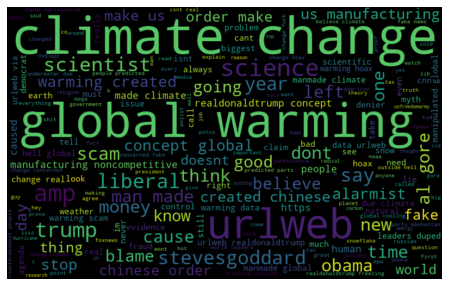

wordcloud for class 0


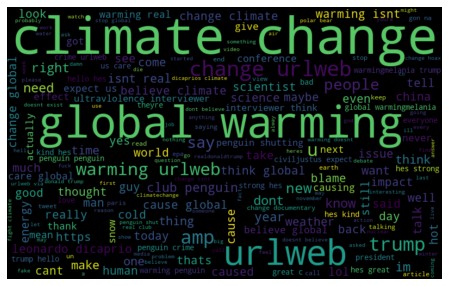

wordcloud for class 1


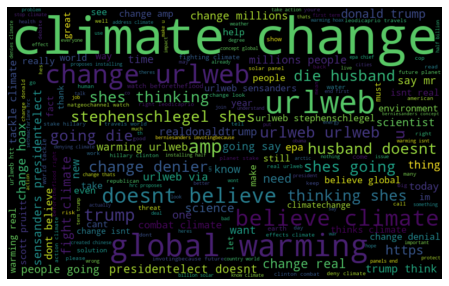

wordcloud for class 2


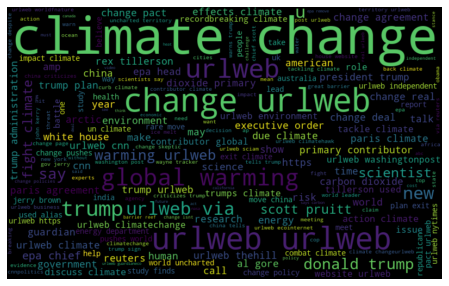

None


In [23]:
# Visualize frequent words for all Class 1 (Climate change believers)
def word_cloud():
    for n in range(-1 , 3):
        print('wordcloud for class {}'.format(n))
        class_words = " ".join([words for words in processed_df_train['clean_sentences'][processed_df_train['sentiment']==n]])
        cloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(class_words)
        #plot wordclouds
        plt.figure(figsize=(8,5))
        plt.imshow(cloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
output = word_cloud()
print(output)

Here, we can see that some words are frequently used across all classes such as 'climate', 'change' and 'hyperlink'. All words will eventually become features that are fed into different models at a later stage, and features that have the same value across all classes are not very usefull in modeling. In fact, we want to remove all the words that don’t provide additional information. We may want to remove these features manually, or adjust our vectorizer to exclude features that do not meet a predefined variance threshold. 

Before removing any more text data, let us first conduct further investigations on the text dataframe to get more insights. In the following code cells, we want to visualise the top 15 hashtages used across all four classes. Seeing as we have alraedy removed the '#' character from the main dataframe, we will use a copy of the original dataframe for this extraction, i.e. **df_train_copy**

In [ ]:
def ht_topic_count(tweet): 
    """
    Using regular expressions, this method takes a tweet and retrieves the top 15 hashtags.
    These hashtags are kept in their own dataframe, along with a tally of how often they appear. 

    Input:
        tweet: original tweets
        datatype: 'str'

    Output:
        hashtag_df: dataframe containing the top hashtags in the tweets
        datatype: dataframe
    """
    
    hashtags = []    
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    
    dfhashtag = pd.DataFrame({'hashtag Topic': list(frequency.keys()),
                       'hastag count': list(frequency.values())})
    return dfhashtag.nlargest(15, columns='hastag count')

In [ ]:
# Apply the ht_topic_count function on the four classes seperately 
c_m1 = ht_topic_count(df_train_copy['message'][df_train_copy['sentiment'] == -1]) #denier
c0 = ht_topic_count(df_train_copy['message'][df_train_copy['sentiment'] == 0]) #neutral
c1 = ht_topic_count(df_train_copy['message'][df_train_copy['sentiment'] == 1]) #believer
c2 = ht_topic_count(df_train_copy['message'][df_train_copy['sentiment'] == 2]) #news

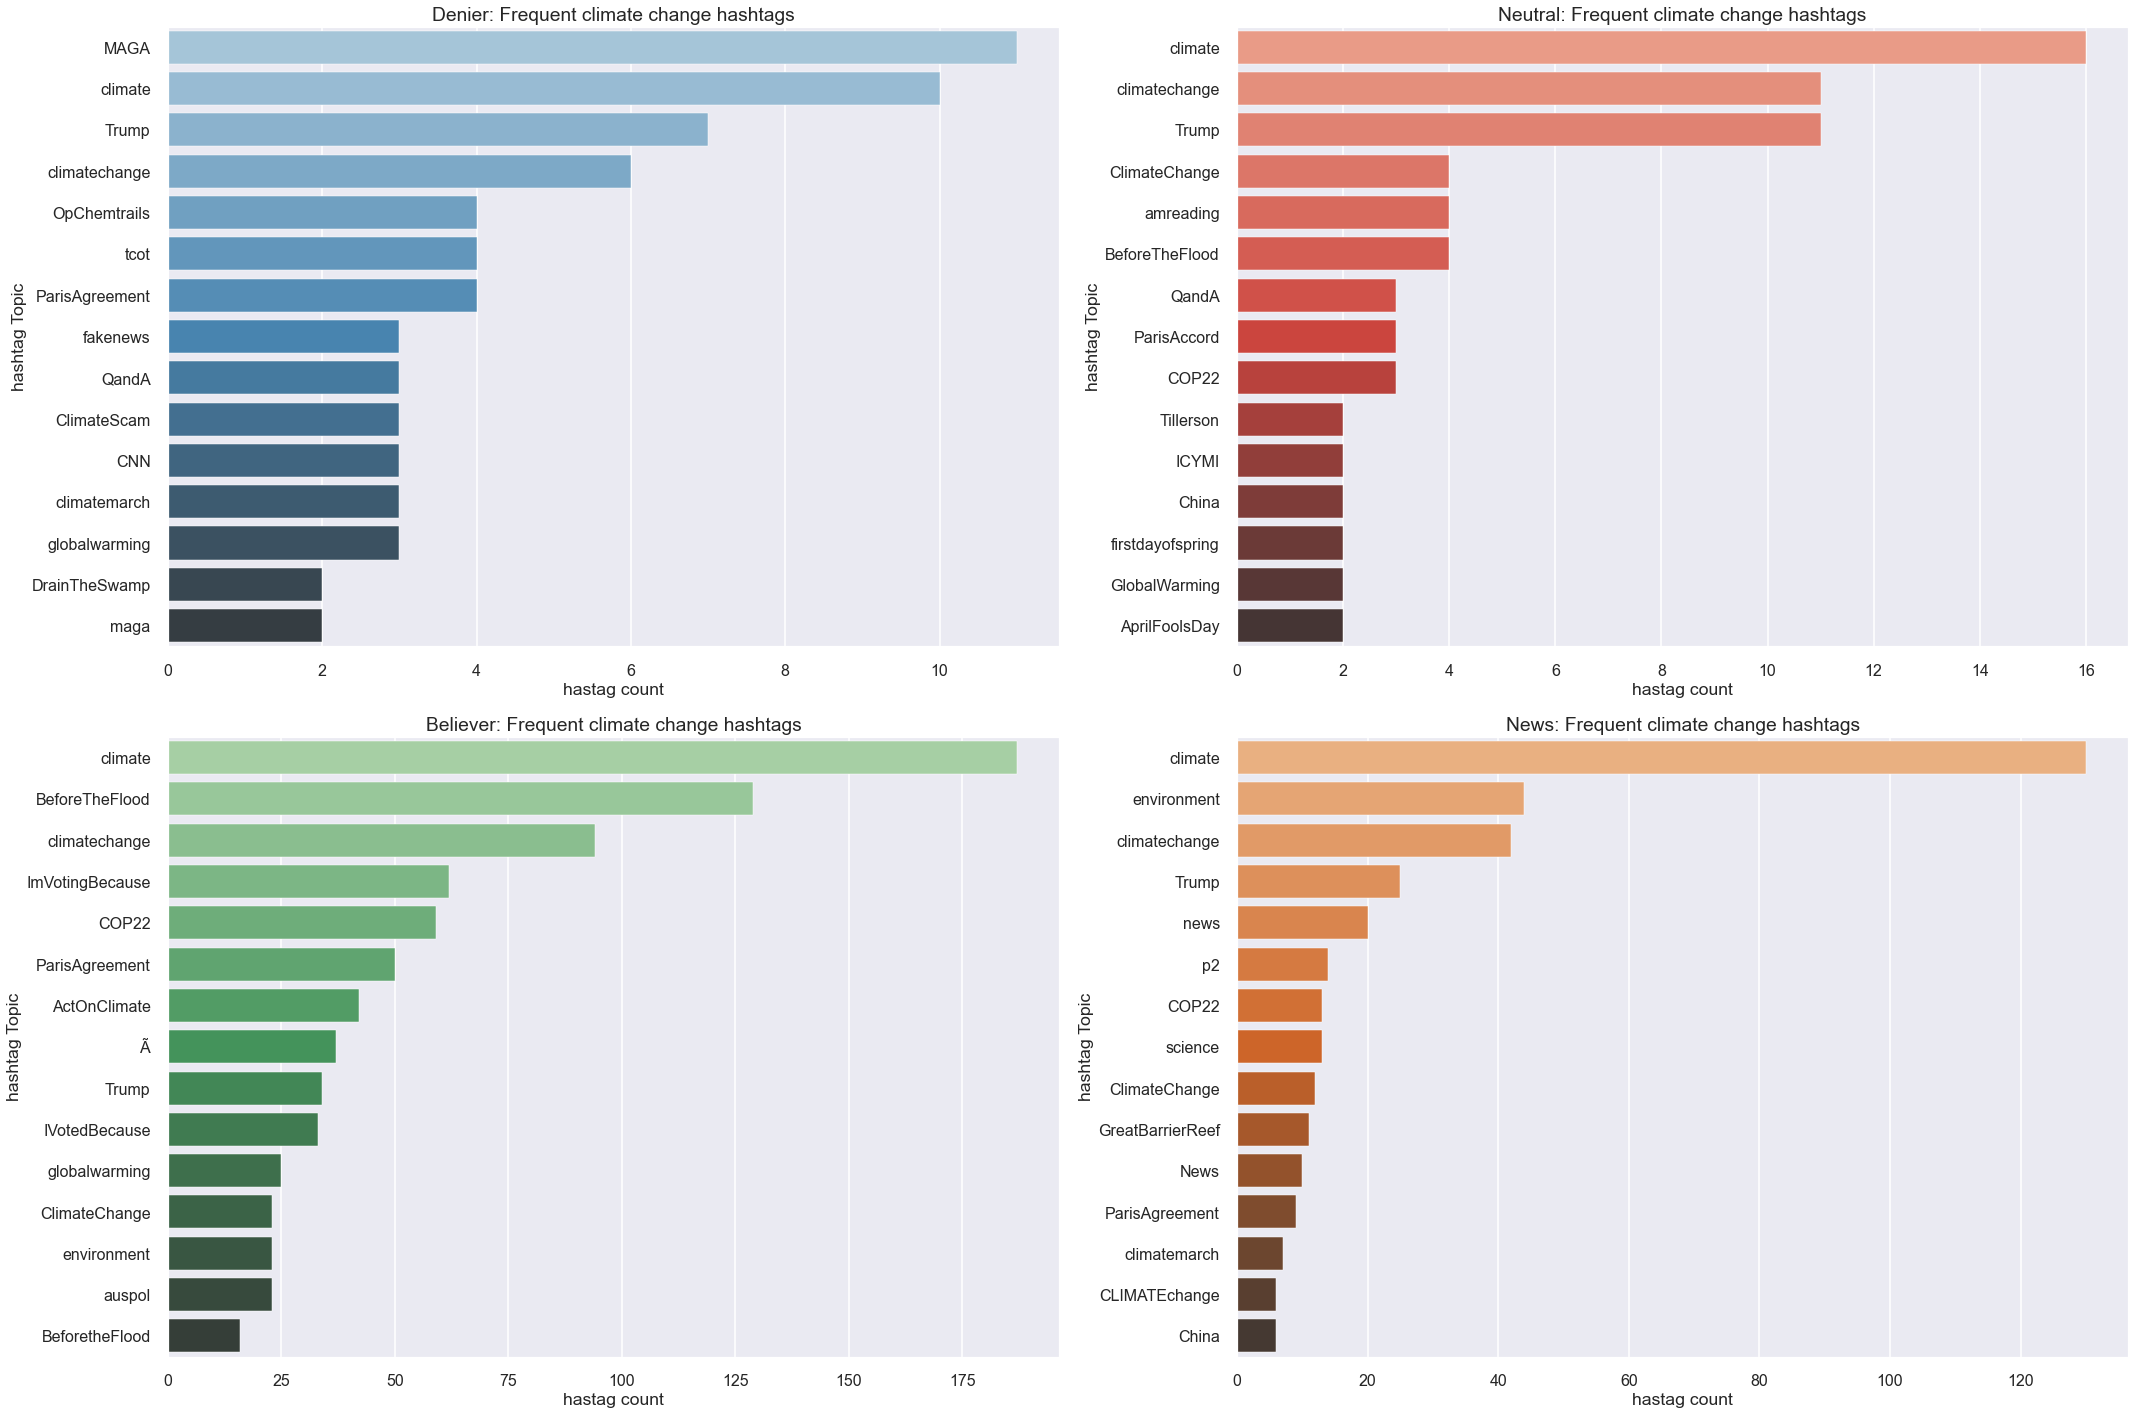

In [ ]:
# Plot the frequent hastags for the four climate change classes
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
sns.barplot(data=c_m1, y=c_m1['hashtag Topic'], x=c_m1['hastag count'], palette=("Blues_d"))
plt.title('Denier: Frequent climate change hashtags')
plt.tight_layout()

plt.subplot(2,2,2)
sns.barplot(data=c0,y=c0['hashtag Topic'], x=c0['hastag count'], palette=("Reds_d"))
plt.title('Neutral: Frequent climate change hashtags')
plt.tight_layout()

plt.subplot(2,2,3)
sns.barplot(data=c1,y=c1['hashtag Topic'], x=c1['hastag count'], palette=("Greens_d"))
plt.title('Believer: Frequent climate change hashtags')
plt.tight_layout()

plt.subplot(2,2,4)
sns.barplot(data=c2,y=c2['hashtag Topic'], x=c2['hastag count'], palette=("Oranges_d"))
plt.title('News: Frequent climate change hashtags')
plt.tight_layout()

From the graphs above, we have visualised the 15 most common hashtags used across the four classes. Again, we notice that a few hashtags are common across all four classes such as 'climate', 'Trump', 'climatechange' etc.

The Bag of Words method below constructs a word presence feature set from all the words in the text, indicating the number of times each word has appeared.

In [ ]:
def bag_of_words_count(words, word_dict={}):
    """ 
    This function takes in a list of words and returns a dictionary with each word as a key, and the value 
    represents the number of times that word appeared.
    """
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [ ]:
type_labels = processed_df_train.sentiment.unique() # array([ 1,  2,  0, -1], dtype=int64)

The code cell below creates a set of dictionaries, one for each of the climate change classes.

In [ ]:
beliver = {}
for pp in type_labels:
    df_label = processed_df_train.groupby('sentiment')
    beliver[pp] = {}
    for row in df_label.get_group(pp)['token_no_stop_word']:
        beliver[pp] = bag_of_words_count(row, beliver[pp])

Create a list of all the unique words, so that we can create a combined bag of words dictionary for all the words in the text.

In [ ]:
all_words = set()
for pp in type_labels:
    for word in beliver[pp]:
        all_words.add(word)

In [ ]:
beliver['all'] = {}
for pp in type_labels:    
    for word in all_words:
        if word in beliver[pp].keys():
            if word in beliver['all']:
                beliver['all'][word] += beliver[pp][word]
            else:
                beliver['all'][word] = beliver[pp][word]

In [ ]:
df_token = pd.DataFrame(beliver, columns = [1, 2, 0, -1, 'all'])

In [ ]:
df_token = df_token.fillna(0)

Now we can calculate how many words there are in total.

In [ ]:
total_words = sum([v for v in beliver['all'].values()]) 
total_words

181757

#### Rare words used in the text data (tweets) 

Below, we visualise the distribution of words that rarely occur, i.e. those that appear less than 10 times in the whole dataset.

Text(0.5, 0, 'word frequency')

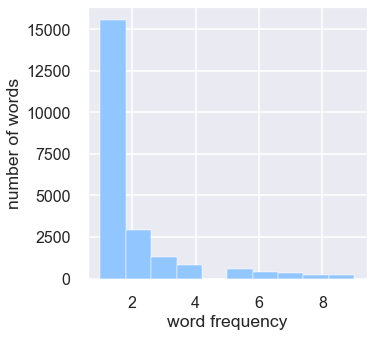

In [ ]:
plt.figure(figsize=(5,5))
_ = plt.hist([v for v in beliver['all'].values() if v < 10],bins=10)
plt.ylabel("number of words")
plt.xlabel("word frequency")

In [ ]:
def get_number_of_words(value):
    """
    Function that returns an integer value that represents the number words that only occured a certain number of times (value).
    
    Input argument, value, to this function is a positive integer.
    Function outputs a positive integer.
    
    Example:
    When the input value = 2, the function returns the total number of words that only appeared twice in the entire data set.
    """
    return len([v for v in beliver['all'].values() if v == value])

In [ ]:
def get_rare_words(value, start , stop):
    """
    This function creates and returns a list of the all the words that only occured a certain number of times (value).
    
    Inputs:
    - value, integer > 0. This is the frequency threshold.
    - start, integer. List slice start value.
    - stop, integer. List slice stop value.
    
    Function outputs a sliced list of words.
    """
    
    
    rare_words = [k for k, v in beliver['all'].items() if v==value] 
    print(rare_words[start:stop], len(rare_words))
    return rare_words

In [ ]:
rare_words = get_rare_words(9, 100, 200)

['funds', 'innovative', 'tillersons', 'womenclimate', 'eriksolheim', 'hunt', 'earthtomarrakech', 'newyorker', 'slowing', 'held', 'illegal', 'planetary', 'itll', 'ah', 'streaming', 'carney', 'temps', 'kid', 'arms', 'tied', 'unfccc', 'smoking', 'scottadamssays', 'changedenying', 'certain', 'happeningand', 'fit', 'da', 'bret', 'everyday', 'canadians', 'trailer', 'announces', 'police', 'disprove', 'challenged', 'initiatives', 'considered', 'marchforscience', 'regime', 'proposal', 'debt', 'findings', 'guns', 'zeroco', 'natureorg', 'turnbullmalcolm', 'advocate', 'contributed', 'scotland', 'climatechangeisreal', 'vault', 'interests', 'wo', 'quality', 'sometimes', 'necessary', 'assume', 'ed', 'coffee', 'oped', 'alarm', 'protesting', 'honor', 'saved', 'arguing', 'defeat', 'fascinating', 'lolgop', 'eventually', 'alexsteffen', 'antarcticas', 'ecosystems', 'heads', 'european', 'note', 'exxonknew', 'syria', 'sa', 'plays', 'earlier', 'reveals', 'worldnews', 'belugasolar', 'mailonline', 'feds', 'gara

In [ ]:
a = len([v for v in beliver['all'].values() if v >= 9]) # how many words appear more than 10 times?
print('There are {} words that occur more that 10 time in the entire dataset'.format(a)) 
more_than_10_times = sum([v for v in beliver['all'].values() if v >= 9]) # how many words of the total does that account for?
print(more_than_10_times)

There are 2463 words that occur more that 10 time in the entire dataset
143762


In [ ]:
def get_short_words(value, start , stop):
    """
    Function creates list of words whose length is less than the given value imput.
    
    Inputs:
    - value, integer > 0. This is the word length threshold.
    - start, integer. List slice start value.
    - stop, integer. List slice stop value.
    
    Function outputs a sliced list of short words.
    """
    
    rare_words = [k for k, v in beliver['all'].items() if len(k) <= value] 
    print(rare_words[start:stop], len(rare_words))
    
    return rare_words

In [ ]:
short_words = get_short_words(3, 0, 288)

['hmu', 'pod', 'ccc', 'ded', 'phd', 'hr', 'win', 'plz', 'b', 'max', 'nem', 'cz', 'rea', 'inc', 'buy', 'pm', 'web', 'aid', 'nbn', 'lb', 'uwm', 'iwd', 'kkk', 'job', 'imf', 'aly', 'imo', 'sky', 'bye', 'yur', 'dnc', 'aw', 'hi', 'apt', 'cal', 'sb', 'nih', 'wa', 'roe', 'te', 'org', 'agw', 'nm', 'yo', 'tie', 'tim', 'mn', 'pts', 'ol', 'ng', 'kxl', 'smh', 'alt', 'wny', 'eat', 'tv', 'mad', 'nut', 'mpk', 'nia', 'hbr', 'lib', 'toy', 'dyk', 'eo', 'hmm', 'ccl', 'lgb', 'der', 'gag', 'mac', 'g', 'jew', 'jan', 'hng', 'neo', 'bli', 'meh', 'cuz', 'nyt', 'lip', 'wh', 'cha', 'edu', 'kat', 'aim', 'vid', 'ai', 'dtf', 'wil', 'npc', 'act', 'ltg', 'hot', 'hip', 'pp', 'viz', 'ray', 'baw', 'mtv', 'goo', 'cut', 'nc', 'def', 'bit', 'tar', 'dna', 'e', 'goj', 'qvc', 'gdp', 'nsa', 'rip', 'bcz', 'dod', 'fat', 'ham', 'imm', 'nah', 'res', 'nhs', 'fl', 'fag', 'xxl', 'nom', 'ne', 'age', 'inf', 'put', 'ww', 'fog', 'fix', 'gst', 'fkt', 'con', 'ctl', 'tea', 'alr', 'km', 'hit', 'cc', 'ar', 'hal', 'iot', 'omg', 'tht', 'mlb', 'j

In [ ]:
print(len([v for k, v in beliver['all'].items() if len(k) <= 2])) # how many words have a length less than 2
low_length = sum([v for k, v in beliver['all'].items() if len(k) <=2]) # how many words of the total does that account for?
print(low_length)

288
4541


If we were to remove the **rare_words** and the **short_words** from the data, what percentage of the data will we be left with? Let's remove this "redundant" data.

In [ ]:
df_token['perc_1'] = (df_token[1] / df_token['all']) * 100
df_token['perc_0'] = (df_token[0] / df_token['all']) * 100
df_token['perc_2'] = (df_token[2] / df_token['all']) * 100
df_token['perc_-1'] = (df_token[-1] / df_token['all']) * 100

In [ ]:
df_token.sort_values('all', ascending = False).head(25)

,1,2,0,-1,all,perc_1,perc_0,perc_2,perc_-1
climate,7342.0,3345.0,1439.0,792.0,12918,56.835423,11.139495,25.894101,6.130980
change,7077.0,3206.0,1375.0,735.0,12393,57.104817,11.094973,25.869442,5.930767
urlweb,4022.0,3925.0,833.0,509.0,9289,43.298525,8.967596,42.254279,5.479600
global,1593.0,508.0,1037.0,634.0,3772,42.232238,27.492047,13.467656,16.808059
warming,1430.0,436.0,967.0,604.0,3437,41.606052,28.135001,12.685482,17.573465
trump,890.0,825.0,147.0,56.0,1918,46.402503,7.664234,43.013556,2.919708
believe,1004.0,21.0,87.0,46.0,1158,86.701209,7.512953,1.813472,3.972366
us,445.0,293.0,101.0,63.0,902,49.334812,11.197339,32.483370,6.984479
doesnt,785.0,23.0,53.0,23.0,884,88.800905,5.995475,2.601810,2.601810
amp,659.0,35.0,100.0,84.0,878,75.056948,11.389522,3.986333,9.567198


Tokens available in every class and in large amounts

In [ ]:
redundant_tokens = ['climate', 'change', 'urlweb', 'global', 'warming', 'trump', 'us',
    'epa', 'via', 'trumps', 'says']

In [ ]:
unwanted = short_words + rare_words + redundant_tokens

In [ ]:
def token_cleaner(df):
    
    #tokenise the tweets and create a column of tokens
    df['clean_tokens'] = [v for v in df['token_no_stop_word'] if v not in unwanted]

    # join the clean_tokens to form a sentence
    clean_tokens = [" ".join(i) for i in df['clean_tokens']]
    df['less_noise'] = clean_tokens
    
    return df

In [ ]:
exp = token_cleaner(processed_df_train) # experimental dataframe

<a id="five"></a>
## 5. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Feature engineering, the process of creating features that can be fed into a machine learning model from raw text data, is one of the more important part of text classification using machine learning. It is the process of using domain knowledge of the data to create features that make machine learning algorithms work. The better the quality of information you provide a machine learning algorithm, the more it will be able to interpret the information well. Feature engineering helps us to create better data which helps the model understand it well and provide reasonable results. 


We currenltly have two dataframes we are going to to explore and run experiments on, i.e. **exp** and **processed_df_train**.

In [ ]:
exp.head(2)

,sentiment,message,tweetid,tokens,token_no_stop_word,lemma,stem,clean_sentences,stem_clean_sentences,lemma_clean_sentences,clean_tokens,less_noise
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...,polyscimajor epa chief doesnt think carbon dio...,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ...","[like, lack, evid, anthropogen, global, warm]",like lack evidence anthropogenic global warming,like lack evid anthropogen global warm,like lack evidence anthropogenic global warming,"[like, lack, evidence, anthropogenic, global, ...",like lack evidence anthropogenic global warming


Tn the **exp** dataframe above, the column we want to conduct experiments on is the **less_noise** column. Keep in mind that we have removed 'unwanted' tokens from this column which included short_words, rare_words and redundant_tokens in the section above. we will be comparing the model performance of this column to the model performance of the same comlum in **processed_df_train** where we have not removed any 'unwanted' tokens.

In [ ]:
processed_df_train.head(2)

,sentiment,message,tweetid,tokens,token_no_stop_word,lemma,stem,clean_sentences,stem_clean_sentences,lemma_clean_sentences,clean_tokens,less_noise
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...,polyscimajor epa chief doesnt think carbon dio...,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ...","[like, lack, evid, anthropogen, global, warm]",like lack evidence anthropogenic global warming,like lack evid anthropogen global warm,like lack evidence anthropogenic global warming,"[like, lack, evidence, anthropogenic, global, ...",like lack evidence anthropogenic global warming


#### Text vectorisation

Up to the point, we have almost completed the necessary steps involved in text cleaning and normalization pre-processing*. 

As we know that many Machine Learning algorithms are not capable of processing strings or plain text in their raw form. In a broad sense, they require numerical numbers as inputs to perform any sort of task, such as classification. Also, from the huge amount of data that is present in the text format, it is imperative to extract some knowledge out of it and build any useful applications. In short, we can say that to build any model in machine learning, the final level data has to be in numerical form because models don’t understand text data directly as humans do. 

We will now convert the processed text into numeric feature vectors so that we can feed it to computers for Machine Learning applications.

There are different ways to convert the text data to numerical vectors but in this notebook, we will only use the Term frequency-inverse document frequency (TF-IDF) method. TF-IDF gives a measure that takes the importance of a word into consideration depending on how frequently it occurs in a document and a corpus.

Notes on the TF-IDF Vectorizer:
* In the TF-IDF method, a document term matrix is generated and each column represents an individual unique word.

* The difference in the TF-IDF method is that each cell doesn’t indicate the term frequency, but contains a weight value that signifies how important a word is for an individual text message or document.

* This method is based on the frequency method but it is different from the count vectorization in the sense that it takes into considerations not just the occurrence of a word in a single document but in the entire corpus.

* TF-IDF gives more weight to less frequently occurring events and less weight to expected events. So, it penalizes frequently occurring words that appear frequently in a document such as “the”, “is” but assigns greater weight to less frequent or rare words.

*Some concepts included in the pipeline of text preprocessing such as Parsing, Grammar, Named Entity Recognition, etc were not explored in this notebook.

##### processed_df_train vectorisation

In [ ]:
# X -> features, y -> label
y =  processed_df_train['sentiment']
X =  processed_df_train['clean_sentences']

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# extracting features
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


# Scale data
scaler = preprocessing.MaxAbsScaler ()
X_train_scaled = scaler.fit_transform(X_train_vect)
X_test_scaled = scaler.transform(X_test_vect)

##### exp vectorisation

In [ ]:
# X -> features, y -> label
y_exp =  exp['sentiment']
X_exp =  exp['less_noise']

# dividing X, y into train and test data
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_exp, random_state = 42)

# extracting features
vectorizer = TfidfVectorizer()
X_train_vect_exp = vectorizer.fit_transform(X_train_exp)
X_test_vect_exp = vectorizer.transform(X_test_exp)

# Scale data
scaler = preprocessing.MaxAbsScaler()
X_train_scaled_exp = scaler.fit_transform(X_train_vect_exp)
X_test_scaled_exp = scaler.transform(X_test_vect_exp)

#### Addressing Class imbalance

In [ ]:
processed_df_train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

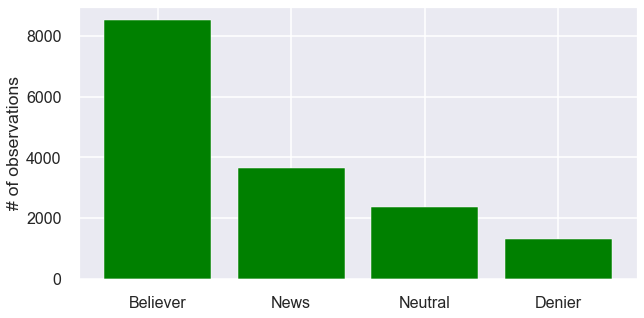

In [ ]:
labels = ['Beleiver', 'News', 'Neutral', 'Denier'] 

# Get all possible labels
plt.figure(figsize=(10,5))
plt.bar(labels,processed_df_train['sentiment'].value_counts(), color='green')
plt.xticks(labels, ['Believer', 'News', 'Neutral', 'Denier']  )
plt.ylabel("# of observations")
plt.show()

When the number of observations in one class is higher than the number of observation in other classes then there exists a class imbalance. For ease of reference, we have the provided the class data distribution graph again in the code cell above. As you can see, the number of observations in class 1 (Believer) is around 8500 when compared with class -1 (Denier) around 1200.

The Problem with Class Imbalance:
Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce errors.

However, if the data set is imbalance then in such cases, you get a pretty high accuracy just by predicting the majority class, but you fail to capture the minority class, which is most often the point of creating the model in the first place. the lack predictive ability to predict the class with fewer observations leads to a problem of bias.

We will sample our data in the two following ways:


  - Upsampling all classes to the class with the highest observations.
  - Downsampling all classes to the class with the least number of observations.
  
By investigating each type of sampling technique, we will then pick which technique performs best from the f1 score.

#### Upsampling

In [ ]:
# Pick a class size of roughly half the size of the largest size
class_size = 8530

# Downsample classes with more than 5000 observations
pro_downsampled = resample(clean_df_train[clean_df_train['sentiment']==1],
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples= class_size, # match number in class_size
                          random_state=27) # reproducible results

# Upsample classes with less than 5000 observations
neutral_upsampled = resample(clean_df_train[clean_df_train['sentiment']==0],
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size, # match number in class_size
                          random_state=27) # reproducible results

# Upsample classes with less than 5000 observations
anti_upsampled = resample(clean_df_train[clean_df_train['sentiment']==-1],
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size, # match number in class_size
                          random_state=27) # reproducible results

# Upsample classes with less than 5000 observations
news_upsampled = resample(clean_df_train[clean_df_train['sentiment']==2],
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size, # match number in class_size
                          random_state=27) # reproducible results

In [ ]:
# Combine sampled classes with majority class
up_sampled = pd.concat([pro_downsampled, neutral_upsampled, anti_upsampled, news_upsampled])

# Check new class counts
up_sampled['sentiment'].value_counts()


 1    8530
 0    8530
-1    8530
 2    8530
Name: sentiment, dtype: int64

Let us have a look at the new distribution of data after upsampling.

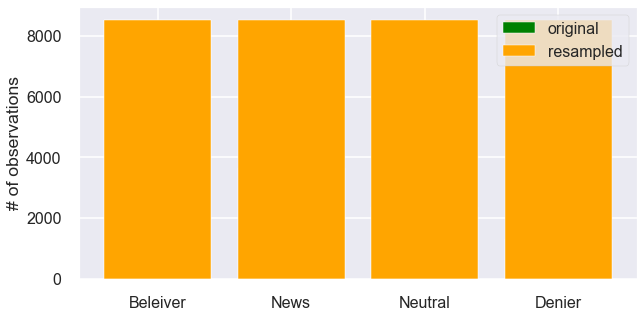

In [ ]:
labels = ['Beleiver', 'News', 'Neutral', 'Denier'] 

# Get all possible labels
plt.figure(figsize=(10,5))
plt.bar(labels,df_train['sentiment'].value_counts() ,color='green')
plt.bar(labels,up_sampled['sentiment'].value_counts() ,color='orange')
plt.xticks(labels, ['Beleiver', 'News', 'Neutral', 'Denier']  )
plt.ylabel("# of observations")
plt.legend(['original','resampled'])
plt.show()

##### up_sampled vectorisation

In [ ]:
# X -> features, y -> label
y_up =  up_sampled['sentiment']
X_up =  up_sampled['message']

# dividing X, y into train and test data
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, random_state = 42)

vectorizer = TfidfVectorizer()
X_train_up_vect = vectorizer.fit_transform(X_train_up)
X_test_up_vect = vectorizer.transform(X_test_up)

# Scale data
scaler = preprocessing.MaxAbsScaler ()
X_train_up_scaled = scaler.fit_transform(X_train_up_vect)
X_test_up_scaled = scaler.transform(X_test_up_vect)


#### Donwsampling

In [ ]:
# Pick a class size of roughly half the size of the largest size
min_class_size = 1296

# Downsample classes with more than 5000 observations
pro_down_sampled = resample(processed_df_train[processed_df_train['sentiment']==1],
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples= min_class_size, # match number in class_size
                          random_state=27) # reproducible results

# Upsample classes with less than 5000 observations
neutral_down_sampled = resample(processed_df_train[processed_df_train['sentiment']==0],
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= min_class_size, # match number in class_size
                          random_state=27) # reproducible results

# Upsample classes with less than 5000 observations
anti_down_sampled = resample(processed_df_train[processed_df_train['sentiment']==-1],
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= min_class_size, # match number in class_size
                          random_state=27) # reproducible results

# Upsample classes with less than 5000 observations
news_down_sampled = resample(processed_df_train[processed_df_train['sentiment']==2],
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= min_class_size, # match number in class_size
                          random_state=27) # reproducible results

In [ ]:
# Combine sampled classes with majority class
down_sampled = pd.concat([pro_down_sampled, neutral_down_sampled, anti_down_sampled, news_down_sampled])

# Check new class counts
down_sampled['sentiment'].value_counts()

 1    1296
 0    1296
-1    1296
 2    1296
Name: sentiment, dtype: int64

Let us have a look at the new distribution of data after downsampling.

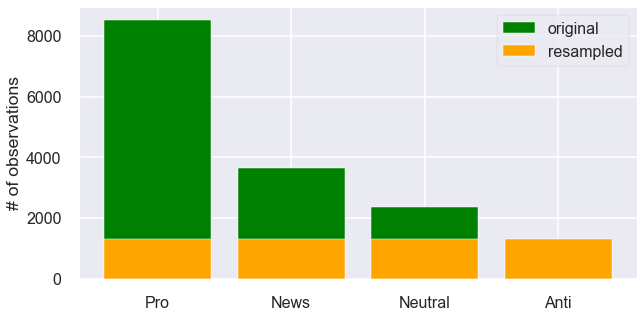

In [ ]:
labels = ['Pro', 'News', 'Neutral', 'Anti'] 

# Get all possible labels
plt.figure(figsize=(10,5))
plt.bar(labels,df_train['sentiment'].value_counts() ,color='green')
plt.bar(labels,down_sampled['sentiment'].value_counts() ,color='orange')
plt.xticks(labels, ['Pro', 'News', 'Neutral', 'Anti'] )
plt.ylabel("# of observations")
plt.legend(['original','resampled'])
plt.show()

##### down_sampled vectorisation

In [ ]:
# X -> features, y -> label
y_down =  down_sampled['sentiment']
X_down =  down_sampled['clean_sentences']

# dividing X, y into train and test data
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_down, y_down, random_state = 42)

# extracting features
vectorizer = TfidfVectorizer()
X_train_down_vect = vectorizer.fit_transform(X_train_down)
X_test_down_vect = vectorizer.transform(X_test_down)

# Scale data
scaler = preprocessing.MaxAbsScaler ()
X_train_down_scaled = scaler.fit_transform(X_train_down_vect)
X_test_down_scaled = scaler.transform(X_test_down_vect)


### Summary

We have created a few datasets that have each been processed slightly differently and will now conduct the following experiments:
- exp[‘less_noise’] vs processed_df_train['clean_sentences'].
- processed_df_train[‘clean_sentences’] vs processed_df_train[‘stem_clean_sentences’] vs processed_df_train[‘lemma_clean_sentences’].
- upsampled['lemma_clean_sentences'] vs downsampled[lemma_clean_sentences'].

<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Training the models with the processed_df_train dataframe

In [ ]:
# training a linear Support Vector Machine classifier
svm_linear = SVC(kernel = 'linear', C = 1).fit(X_train_vect, y_train)
svm_predictions = svm_linear.predict(X_test_vect)

print('Classification Report Linear SVM')
print(classification_report(y_test, svm_predictions))

Classification Report Linear SVM
              precision    recall  f1-score   support

          -1       0.79      0.42      0.55       336
           0       0.60      0.40      0.48       547
           1       0.76      0.87      0.81      2178
           2       0.76      0.79      0.77       894

    accuracy                           0.75      3955
   macro avg       0.73      0.62      0.65      3955
weighted avg       0.74      0.75      0.73      3955



In [ ]:
# training a poly Support Vector Machine classifier
svm_poly = SVC(kernel='poly', degree=3, C=1).fit(X_train_vect, y_train)
poly_predictions = svm_poly.predict(X_test_vect)

print('Classification Report Poly SVM')
print(classification_report(y_test, poly_predictions))

Classification Report Poly SVM
              precision    recall  f1-score   support

          -1       1.00      0.11      0.20       336
           0       0.94      0.11      0.20       547
           1       0.62      0.98      0.76      2178
           2       0.92      0.41      0.56       894

    accuracy                           0.66      3955
   macro avg       0.87      0.40      0.43      3955
weighted avg       0.76      0.66      0.59      3955



In [ ]:
# # training a rbf Support Vector Machine classifier
svm_rbf = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train_vect, y_train)
rbf_predictions = svm_rbf.predict(X_test_vect)

print('Classification Report RBF SVM')
print(classification_report(y_test, rbf_predictions))

Classification Report RBF SVM
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       336
           0       1.00      0.02      0.03       547
           1       0.56      1.00      0.72      2178
           2       0.95      0.09      0.16       894

    accuracy                           0.57      3955
   macro avg       0.63      0.28      0.23      3955
weighted avg       0.66      0.57      0.44      3955



In [ ]:
# training a Naive Bayes Multinomial classifier
nb = MultinomialNB()
nb.fit(X_train_vect, y_train)

nb_predictions = nb.predict(X_test_vect)

print('Classification Report Naive Bayes Multinomial')
print(classification_report(y_test, nb_predictions))

Classification Report Naive Bayes Multinomial
              precision    recall  f1-score   support

          -1       1.00      0.02      0.04       336
           0       0.97      0.06      0.11       547
           1       0.62      0.99      0.76      2178
           2       0.89      0.44      0.59       894

    accuracy                           0.65      3955
   macro avg       0.87      0.38      0.38      3955
weighted avg       0.76      0.65      0.57      3955



In [ ]:
# training a Naive Bayes Gaussain classifier
gnb = GaussianNB().fit(X_train_vect.toarray(), y_train)
gnb_predictions = gnb.predict(X_test_vect.toarray())

print('Classification Report Naive Bayes Gaussian')
print(classification_report(y_test, gnb_predictions))

Classification Report Naive Bayes Gaussian
              precision    recall  f1-score   support

          -1       0.28      0.47      0.35       336
           0       0.31      0.31      0.31       547
           1       0.73      0.60      0.66      2178
           2       0.55      0.67      0.60       894

    accuracy                           0.56      3955
   macro avg       0.47      0.51      0.48      3955
weighted avg       0.59      0.56      0.57      3955



In [ ]:
# training a multi class Logistic Regression classifier
log = LogisticRegression(multi_class='ovr').fit(X_train_scaled, y_train)
log_predictions = log.predict(X_test_scaled)

print('Classification Report Linear logistics')
print(classification_report(y_test, log_predictions))

Classification Report Linear logistics
              precision    recall  f1-score   support

          -1       0.78      0.40      0.53       336
           0       0.62      0.39      0.48       547
           1       0.76      0.88      0.82      2178
           2       0.75      0.77      0.76       894

    accuracy                           0.75      3955
   macro avg       0.73      0.61      0.65      3955
weighted avg       0.74      0.75      0.74      3955



In [ ]:
# training a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_vect, y_train)
knn_predictions = knn.predict(X_test_vect)

print('Classification Report KNN')
print(classification_report(y_test, knn_predictions))

Classification Report KNN
              precision    recall  f1-score   support

          -1       0.61      0.34      0.44       336
           0       0.44      0.34      0.39       547
           1       0.73      0.77      0.75      2178
           2       0.60      0.69      0.64       894

    accuracy                           0.66      3955
   macro avg       0.59      0.54      0.55      3955
weighted avg       0.65      0.66      0.65      3955



In [ ]:
# training a Descision Tree Classifier
dtree = DecisionTreeClassifier(max_depth = 50).fit(X_train_scaled, y_train)
dtree_predictions = dtree.predict(X_test_scaled)
 
print('Classification Report Decision Tree')
print(classification_report(y_test, dtree_predictions))

Classification Report Decision Tree
              precision    recall  f1-score   support

          -1       0.47      0.20      0.28       336
           0       0.41      0.39      0.40       547
           1       0.67      0.79      0.73      2178
           2       0.65      0.56      0.60       894

    accuracy                           0.63      3955
   macro avg       0.55      0.48      0.50      3955
weighted avg       0.62      0.63      0.61      3955



In [ ]:
# training a Random Forest Classifier
forest = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_vect, y_train)
forest_predictions = forest.predict(X_test_scaled)

print('Classification Report Random Forest')
print(classification_report(y_test, forest_predictions))

Classification Report Random Forest
              precision    recall  f1-score   support

          -1       0.77      0.19      0.31       336
           0       0.37      0.54      0.44       547
           1       0.73      0.76      0.75      2178
           2       0.71      0.65      0.68       894

    accuracy                           0.66      3955
   macro avg       0.65      0.53      0.54      3955
weighted avg       0.68      0.66      0.65      3955



Training the models with the exp dataframe

In [ ]:
# training a linear Support Vector Machine classifier
svm_linear_exp = SVC(kernel = 'linear', C = 1).fit(X_train_vect_exp, y_train_exp)
svm_predictions_exp = svm_linear_exp.predict(X_test_vect_exp)

print('Classification Report Linear SVM')
print(classification_report(y_test_exp, svm_predictions_exp))

Classification Report Linear SVM
              precision    recall  f1-score   support

          -1       0.79      0.42      0.55       336
           0       0.60      0.40      0.48       547
           1       0.76      0.87      0.81      2178
           2       0.76      0.79      0.77       894

    accuracy                           0.75      3955
   macro avg       0.73      0.62      0.65      3955
weighted avg       0.74      0.75      0.73      3955



In [ ]:
# training a poly Support Vector Machine classifier
svm_poly_exp = SVC(kernel='poly', degree=3, C=1).fit(X_train_vect_exp, y_train_exp)
poly_predictions_exp = svm_poly_exp.predict(X_test_vect_exp)

print('Classification Report Poly SVM')
print(classification_report(y_test_exp, poly_predictions_exp))

Classification Report Poly SVM
              precision    recall  f1-score   support

          -1       1.00      0.11      0.20       336
           0       0.94      0.11      0.20       547
           1       0.62      0.98      0.76      2178
           2       0.92      0.41      0.56       894

    accuracy                           0.66      3955
   macro avg       0.87      0.40      0.43      3955
weighted avg       0.76      0.66      0.59      3955



In [ ]:
# # training a rbf Support Vector Machine classifier
svm_rbf_exp = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train_vect_exp, y_train_exp)
rbf_predictions_exp = svm_rbf_exp.predict(X_test_vect_exp)

print('Classification Report RBF SVM')
print(classification_report(y_test_exp, rbf_predictions_exp))

Classification Report RBF SVM
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       336
           0       1.00      0.02      0.03       547
           1       0.56      1.00      0.72      2178
           2       0.95      0.09      0.16       894

    accuracy                           0.57      3955
   macro avg       0.63      0.28      0.23      3955
weighted avg       0.66      0.57      0.44      3955



In [ ]:
# training a Naive Bayes Multinomial classifier
nb_exp = MultinomialNB()
nb_exp.fit(X_train_vect_exp, y_train_exp)

nb_predictions_exp = nb_exp.predict(X_test_vect_exp)

print('Classification Report Naive Bayes Multinomial')
print(classification_report(y_test_exp, nb_predictions_exp))

Classification Report Naive Bayes Multinomial
              precision    recall  f1-score   support

          -1       1.00      0.02      0.04       336
           0       0.97      0.06      0.11       547
           1       0.62      0.99      0.76      2178
           2       0.89      0.44      0.59       894

    accuracy                           0.65      3955
   macro avg       0.87      0.38      0.38      3955
weighted avg       0.76      0.65      0.57      3955



In [ ]:
# training a Naive Bayes Gaussain classifier
gnb_exp = GaussianNB().fit(X_train_vect_exp.toarray(), y_train_exp)
gnb_predictions_exp = gnb_exp.predict(X_test_vect_exp.toarray())

print('Classification Report Naive Bayes Gaussian')
print(classification_report(y_test_exp, gnb_predictions_exp))

Classification Report Naive Bayes Gaussian
              precision    recall  f1-score   support

          -1       0.28      0.47      0.35       336
           0       0.31      0.31      0.31       547
           1       0.73      0.60      0.66      2178
           2       0.55      0.67      0.60       894

    accuracy                           0.56      3955
   macro avg       0.47      0.51      0.48      3955
weighted avg       0.59      0.56      0.57      3955



In [ ]:
# training a multi class Logistic Regression classifier
log_exp = LogisticRegression(multi_class='ovr').fit(X_train_scaled_exp, y_train_exp)
log_predictions_exp = log.predict(X_test_scaled)

print('Classification Report Linear logistics')
print(classification_report(y_test_exp, log_predictions_exp))

Classification Report Linear logistics
              precision    recall  f1-score   support

          -1       0.78      0.40      0.53       336
           0       0.62      0.39      0.48       547
           1       0.76      0.88      0.82      2178
           2       0.75      0.77      0.76       894

    accuracy                           0.75      3955
   macro avg       0.73      0.61      0.65      3955
weighted avg       0.74      0.75      0.74      3955



In [ ]:
# training a KNN classifier
knn_exp = KNeighborsClassifier(n_neighbors = 7).fit(X_train_vect_exp, y_train_exp)
knn_predictions_exp = knn_exp.predict(X_test_vect_exp)

print('Classification Report KNN')
print(classification_report(y_test_exp, knn_predictions_exp))

Classification Report KNN
              precision    recall  f1-score   support

          -1       0.61      0.34      0.44       336
           0       0.44      0.34      0.39       547
           1       0.73      0.77      0.75      2178
           2       0.60      0.69      0.64       894

    accuracy                           0.66      3955
   macro avg       0.59      0.54      0.55      3955
weighted avg       0.65      0.66      0.65      3955



In [ ]:
# training a Descision Tree Classifier
dtree_exp = DecisionTreeClassifier(max_depth = 50).fit(X_train_scaled_exp, y_train_exp)
dtree_predictions_exp = dtree_exp.predict(X_test_scaled_exp)
 
print('Classification Report Decision Tree')
print(classification_report(y_test_exp, dtree_predictions_exp))

Classification Report Decision Tree
              precision    recall  f1-score   support

          -1       0.45      0.21      0.28       336
           0       0.41      0.37      0.39       547
           1       0.67      0.78      0.72      2178
           2       0.65      0.57      0.61       894

    accuracy                           0.63      3955
   macro avg       0.55      0.48      0.50      3955
weighted avg       0.61      0.63      0.61      3955



In [ ]:
# training a Random Forest Classifier
forest_exp = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_vect_exp, y_train_exp)
forest_predictions_exp = forest_exp.predict(X_test_scaled_exp)

print('Classification Report Random Forest')
print(classification_report(y_test, forest_predictions_exp))

Classification Report Random Forest
              precision    recall  f1-score   support

          -1       0.77      0.19      0.31       336
           0       0.37      0.54      0.44       547
           1       0.73      0.76      0.75      2178
           2       0.71      0.65      0.68       894

    accuracy                           0.66      3955
   macro avg       0.65      0.53      0.54      3955
weighted avg       0.68      0.66      0.65      3955



In [ ]:
names = ['Linear SVM', 'Poly SVM', 'RBF SVM', 'Naive Bayes Multinomial',
         'Naive Bayes Gaussian', 'Logistic Regression', 'K Nearest Neighbours',
        'Decision Tree, Random Forest']

In [ ]:
predictions = [svm_predictions, poly_predictions, rbf_predictions, nb_predictions, gnb_predictions, 
               log_predictions, knn_predictions, dtree_predictions, forest_predictions ]
predictions_exp = [svm_predictions_exp, poly_predictions_exp, rbf_predictions_exp, nb_predictions_exp, gnb_predictions_exp, 
               log_predictions_exp, knn_predictions_exp, dtree_predictions_exp, forest_predictions_exp ]

In [ ]:
from collections import defaultdict
class_results_dict = defaultdict(list)

for i, name in enumerate(names):
    f1 = metrics.f1_score(y_test, predictions[i],average='weighted')    
    f1_exp = metrics.f1_score(y_test, predictions_exp[i], average='weighted')    

    class_results_dict['Model_Name'].append(name)
    class_results_dict['F1-score'].append(f1)
    class_results_dict['F1-score exp'].append(f1_exp)
       
class_results_df = pd.DataFrame(class_results_dict)

In [ ]:
class_results_df

,F1-score,F1-score exp
Model_Name,,
Linear SVM,0.734898,0.734898
Poly SVM,0.592182,0.592182
RBF SVM,0.437086,0.437086
Naive Bayes Multinomial,0.570893,0.570893
Naive Bayes Gaussian,0.570550,0.570550
Logistic Regression,0.735477,0.735477
K Nearest Neighbours,0.648512,0.648512
"Decision Tree, Random Forest",0.614587,0.613779


---
#### Stemmed dataset before sampling

In [ ]:
y_stem =  processed_df_train['sentiment']
X_stem =  processed_df_train['stem_clean_sentences']

# dividing X_stem, y_stem into train and test data
X_train_stem, X_test_stem, y_train_stem, y_test_stem = train_test_split(X_stem, y_stem, random_state = 42)

vectorizer = TfidfVectorizer()
X_train_vect_stem = vectorizer.fit_transform(X_train_stem)
X_test_vect_stem = vectorizer.transform(X_test_stem)

# Scale data
X_train_scaled_stem = scaler.fit_transform(X_train_vect_stem)
X_test_scaled_stem = scaler.transform(X_test_vect_stem)

In [ ]:
# training a linear Support Vector Machine classifier
svm_linear_stem = SVC(kernel = 'linear', C = 1).fit(X_train_vect_stem, y_train_stem)
svm_predictions_stem = svm_linear_stem.predict(X_test_vect_stem)

print('Classification Report Linear SVM')
print(classification_report(y_test_stem, svm_predictions_stem))

In [ ]:
# training a multi class Logistic Regression classifier
log_stem = LogisticRegression(multi_class='ovr').fit(X_train_vect_stem, y_train_stem)
log_predictions_stem = log_stem.predict(X_test_scaled)

print('Classification Report Linear logistics')
print(classification_report(y_test_stem, log_predictions_stem))

In [ ]:
# Training the scaled upsampled data for the Linear Logistics classifier
log_scaled_stem = LogisticRegression(multi_class='ovr').fit(X_train_scaled_stem, y_train_stem)
log_predictions_scaled_stem = log_scaled_stem.predict(X_test_scaled_stem)

# printing the classification report
print('Classification Report Linear logistics')
print(classification_report(y_test_stem, log_predictions_scaled_stem))

----
#### Stemmed dataset after upsampling

In [ ]:
y_up_stem =  up_sampled['sentiment']
X_up_stem =  up_sampled['stem_clean_sentences']

# dividing X, y into train and test data
X_train_up_stem, X_test_up_stem, y_train_up_stem, y_test_up_stem = train_test_split(X_up_stem, y_up_stem, random_state = 42)

vectorizer = TfidfVectorizer()
X_train_vect_up_stem = vectorizer.fit_transform(X_train_up_stem)
X_test_vect_up_stem = vectorizer.transform(X_test_up_stem)

# Scale data
scaler = preprocessing.MaxAbsScaler()
X_train_scaled_up_stem = scaler.fit_transform(X_train_vect_up_stem)
X_test_scaled_up_stem = scaler.transform(X_test_vect_up_stem)

In [ ]:
# training a linear Support Vector Machine classifier
svm_linear_up_stem = SVC(kernel = 'linear', C = 1).fit(X_train_vect_up_stem, y_train_up_stem)
svm_predictions_up_stem = svm_linear_up_stem.predict(X_test_up_stem)

print('Classification Report Linear SVM')
print(classification_report(y_test_up_stem, svm_predictions_up_stem))

In [ ]:
# training a multi class Logistic Regression classifier
log_up_stem = LogisticRegression(multi_class='ovr').fit(X_train_vect_stem, y_train_stem)
log_predictions_up_stem = log_up_stem.predict(X_test_vect_up_stem)

print('Classification Report Linear logistics')
print(classification_report(y_test_up_stem, log_predictions_up_stem))

In [ ]:
# Training the scaled upsampled data for the Linear Logistics classifier
log_up_scaled_stem = LogisticRegression(multi_class='ovr').fit(X_train_scaled_up_stem, y_train_up_stem)
log_predictions_up_scaled_stem = log_up_scaled_stem.predict(X_test_scaled_up_stem)

# printing the classification report
print('Classification Report Linear logistics')
print(classification_report(y_test_up_stem, log_predictions_up_scaled_stem))

##### Lemmatized dataset before scaling

In [ ]:
#Sello

y_lemma =  processed_df_train['sentiment']
X_lemma =  processed_df_train['lemma_clean_sentences']

# dividing X_stem, y_stem into train and test data
X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma = train_test_split(X_lemma, y_lemma, random_state = 42)

vectorizer = TfidfVectorizer()
X_train_vect_lemma = vectorizer.fit_transform(X_train_lemma)
X_test_vect_lemma = vectorizer.transform(X_test_lemma)

# Scale data
X_train_scaled_lemma = scaler.fit_transform(X_train_vect_lemma)
X_test_scaled_lemma = scaler.transform(X_test_vect_lemma)

In [ ]:
# training a linear Support Vector Machine classifier
svm_linear_lemma = SVC(kernel = 'linear', C = 1).fit(X_train_scaled_lemma, y_train_lemma)
svm_predictions_lemma = svm_linear_stem.predict(X_test_vect_lemma)

print('Classification Report Linear SVM')
print(classification_report(y_test_lemma, svm_predictions_lemma))

In [ ]:
# training a multi class Logistic Regression classifier
log_up_lemma = LogisticRegression(multi_class='ovr').fit(X_train_scaled_lemma, y_train_lemma)
log_predictions_up_lemma = log_up_stem.predict(X_test_vect_lemma)

print('Classification Report Linear logistics')
print(classification_report(y_test_lemma, log_predictions_up_lemma))

In [ ]:
# training a Naive Bayes Multinomial classifier
multinomial_NB = MultinomialNB().fit(X_train_scaled_lemma, y_train_lemma)

nb_predictions = nb.predict(X_test_vect_lemma)

print('Classification Report Naive Bayes Multinomial')
print(classification_report(y_test_lemma, nb_predictions))

##### Lemmatized upscaled dataset

In [ ]:
y_up_lemma =  up_sampled['sentiment']
X_up_lemma =  up_sampled['lemma_clean_sentences']

# dividing X, y into train and test data
X_train_up_lemma, X_test_up_lemma, y_train_up_lemma, y_test_up_lemma = train_test_split(X_up_lemma , y_up_lemma, random_state = 42)

vectorizer = TfidfVectorizer()
X_train_vect_up_lemma = vectorizer.fit_transform(X_train_up_lemma)
X_test_vect_up_lemma = vectorizer.transform(X_test_up_lemma)

# Scale data
scaler = preprocessing.MaxAbsScaler()
X_train_scaled_up_lemma = scaler.fit_transform(X_train_vect_up_lemma)
X_test_scaled_up_lemma = scaler.transform(X_test_vect_up_lemma)

In [ ]:
# training a linear Support Vector Machine classifier
svm_linear_lemma = SVC(kernel = 'linear', C = 1).fit(X_train_up_lemma, y_train_up_lemma)
svm_predictions_lemma = svm_linear_stem.predict(X_test_up_lemma)

print('Classification Report Linear SVM')
print(classification_report(y_test_up_lemma, svm_predictions_lemma))

In [ ]:
# training a multi class Logistic Regression classifier
log_up_lemma = LogisticRegression(multi_class='ovr').fit(X_train_up_lemma, y_train_up_lemma)
log_predictions_up_lemma = log_up_stem.predict(X_test_up_lemma)

print('Classification Report Linear logistics')
print(classification_report(y_test_up_lemma, log_predictions_up_lemma))

In [ ]:
# training a Naive Bayes Multinomial classifier
multinomial_NB = MultinomialNB().fit(X_train_up_lemma, y_train_up_lemma)

nb_predictions = nb.predict(X_test_up_lemma)

print('Classification Report Naive Bayes Multinomial')
print(classification_report(y_test_up_lemma, nb_predictions))

#### modelling with upsampled data


In [ ]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(up_V_train_X,up_y_train)
up_svm_predictions = svm_model_linear.predict(up_V_test_X)
 
# model accuracy for V_test_X 
accuracy = svm_model_linear.score(up_V_test_X, up_y_test)
 
# creating a confusion matrix
cm2 = confusion_matrix(up_y_test, up_svm_predictions)

print('Classification Report SVM')
print(classification_report(up_y_test, up_svm_predictions))

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
accuracy_df.plot(kind='bar', ylim=[0.65,0.77], ax=ax[0])
precision_df.plot(kind='bar', ylim=[0.70,0.80], ax=ax[1])

In [ ]:
# training a Linear Logistics 
from sklearn.linear_model import LogisticRegression
lm_vt = LogisticRegression(multi_class='ovr').fit(up_V_train_X, up_y_train)
up_pred_lr_vt = lm_vt.predict(up_V_test_X)

# printing the classification report
print('Classification Report Linear logistics')
print(classification_report(up_y_test, up_pred_lr_vt))

In [ ]:
# Training the scaled data for the Linear Logistics

slm_vt = LogisticRegression(multi_class='ovr').fit(up_X_train_scaled, up_y_train)
up_spred_lr_vt = slm_vt.predict(up_X_test_scaled)
print('Classification Report Linear logistics')
print(classification_report(up_y_test,up_spred_lr_vt))

The models seem to perfom better with the `upsampled data`, thus we use it to further conduct our experiments and hypertuning 

<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])

X = scaler.fit_transform(pipeline.fit_transform(down_X_train).todense())

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c = down_y_train)

# 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(X)
centers2D = pca.transform(kmeans.cluster_centers_)

plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='x', s=200, linewidths=3, c='b')
plt.show()              #not required if using ipython notebook


The perfomance seems to `drop` with the `downsampled data` model

# Hyperparameter tuning

In [ ]:
# Import Grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# training a linear SVM classifier
from sklearn.svm import SVC

# number of folds to be tested on
nfolds = 5

# the values of c to check for
Cs = [0.001, 0.01, 0.1, 1, 10]

# the values of gamma
gammas = [0.001, 0.01, 0.1, 1]

# Creating the parameters dictionary
param_grid = {
    'C'     : Cs,
    'gamma' : gammas
    }

# Applying the grid search and comparing based on the f1 score
grid_SVM = GridSearchCV(SVC(kernel='linear'), param_grid, scoring='f1', cv=nfolds)
grid_SVM.fit(up_V_train_X, up_y_train)

# Getting the best parameters of grid search
grid_SVM.best_params_


In [ ]:
pipelineSVC = make_pipeline(StandardScaler(), SVC(random_state=1))
#
# Create the parameter grid
#
param_grid_svc = [{
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['linear']
                  },
                 {
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['rbf']
                 }]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsSVC = GridSearchCV(estimator=pipelineSVC,
                     param_grid = param_grid_svc,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the SVM classifier
#
gsSVC.fit(X_train, y_train)
#
# Print the training score of the best model
#
print(gsSVC.best_score_)
#
# Print the model parameters of the best model
#
print(gsSVC.best_params_)
#
# Print the model score on the test data using GridSearchCV score method
#
print('Test accuracy: %.3f' % gsSVC.score(X_test, y_test))
#
# Print the model score on the test data using Best estimator instance
#
clfSVC = gsSVC.best_estimator_
print('Test accuracy: %.3f' % clfSVC.score(X_test, y_test))

In [ ]:
grid_SVM.best_params_


In [ ]:
#rbf = SVC(kernel='rbf', gamma=0.001, C=0.001).fit(V_train_X, y_train)
poly = SVC(kernel='poly', degree=0.001, C=0.100).fit(V_train_Xf, yf)

poly_pred = poly.predict(V_test_X)
#rbf_pred = rbf.predict(V_test_X)
print('Classification Report poly_pred ')
print(classification_report(y_test, poly_pred))

# Selecting Best Features

In [ ]:
# Import the feature selector module
from sklearn import feature_selection
from sklearn.feature_selection import f_classif

# Set up selector, choosing score function and number of features to retain
selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k=20)


# Transform (i.e.: run selection on) the training data
X_train_kbest = selector_kbest.fit_transform(V_train_X, y_train)

# Fit model to the transformed data
SVM_k_best = SVC(kernel='linear', degree=0.001, C=0.001).fit(X_train_kbest, y_train)


# Before generating predictions, we'll need to transform the test data the same way we did the train data
X_test_kbest = selector_kbest.transform(V_test_X)


# Generate predictions from var thresh model
pred_lm_kbest = SVM_k_best.predict(X_test_kbest)


#rbf_pred = rbf.predict(V_test_X)
print('Classification Report poly_pred ')
print(classification_report(y_test, pred_lm_kbest))

In [ ]:
X_train_kbest.shape

In [ ]:
# Fit model to the transformed data
SVM_k_best = SVC(kernel='poly', degree=0.001, C=0.001).fit(X_train_kbest, y_train)

In [ ]:
# Before generating predictions, we'll need to transform the test data the same way we did the train data
X_test_kbest = selector_kbest.transform(V_test_X)

# Generate predictions from var thresh model
pred_lm_kbest = SVM_k_best.predict(X_test_kbest)

In [ ]:
#rbf_pred = rbf.predict(V_test_X)
print('Classification Report poly_pred ')
print(classification_report(y_test, pred_lm_kbest))

#### Making a Submission

In [ ]:
# Traing the model with the entire data
yf = up_sampled['sentiment']
Xf = up_sampled['message']pus

In [ ]:
X_testf = clean_df_test['message']

In [ ]:
# extracting features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer2 = TfidfVectorizer(ngram_range = (1,3))
V_train_Xf = vectorizer2.fit_transform(Xf)
V_test_Xf = vectorizer2.transform(X_testf)

# Import the scaler module
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

# Scale data
X_Train_f = scaler.fit_transform(V_train_Xf)
X_Test_f = scaler.transform(V_test_Xf)

In [ ]:
V_test_Xf.shape

In [ ]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear_f = SVC(kernel = 'linear', C = 1, gamma = 0.5, probability= True).fit(V_train_Xf,yf)
final_preds = svm_model_linear_f.predict(V_test_Xf)

In [ ]:
# training a Linear Logistics 
from sklearn.linear_model import LogisticRegression
slm_vt_f_o = LogisticRegression(C = 0.5, multi_class='ovr').fit(X_Train_f, yf)
spred_lr_vt_f = slm_vt_f_o.predict(X_Test_f)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier_f = MultinomialNB(alpha = 0.5)
nb_classifier_f.fit(X_Train_f, yf)

fpred = nb_classifier_f.predict(X_Test_f)

In [ ]:
import pickle
with open('vectorizer_4.pkl', 'wb') as fin:
    pickle.dump(vectorizer2, fin)

In [ ]:
import pickle

# save the model to disk
model_name = ['SVC_linear', "Linear_LogisticsC", 'MultiNB']
models = [svm_model_linear_f, slm_vt_f_o, nb_classifier_f]
for i in range(len(models)):
        filename = model_name[i] + '_final_4.pkl'
        pickle.dump(models[i], open(filename, 'wb'))



In [ ]:
preds = [final_preds, spred_lr_vt_f, fpred]
preds[0]

In [ ]:
def submissions(preds): 
    
    
    model = ['SVC_linear', 'LogisticsRegression', 'MultinomialNB']
    
    for i in range(len(model)):
        daf = pd.DataFrame(preds[i], columns=['sentiment'])
        output = pd.DataFrame({"tweetid":df_test['tweetid']})
        final = output.join(daf)
        final_name = model[i] +"_finalise59.csv"
        final.to_csv(final_name, index=False)
        

    return final

In [ ]:
df = submissions(preds)

In [ ]:
df.head()